# 1. Import libraries

In [14]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
import sklearn.model_selection as model_selection
import sklearn.preprocessing as pre
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as Rsquared
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm

In [5]:
import os
os.getcwd()
os.chdir('C:\\Users\\USER\\Documents')

# I Loading Datasets

In [9]:
df = pd.read_csv('Student_recruitment.csv', index_col = 'sl_no')
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [10]:
df = pd.read_csv('Student_recruitment.csv')
df = df.set_index('sl_no')
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 1 to 215
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 25.2+ KB


In [12]:
df.gender.value_counts()

M    139
F     76
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

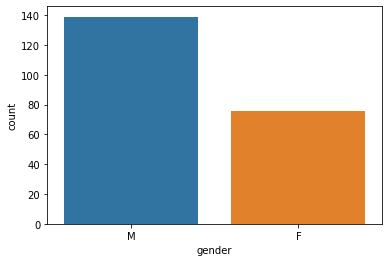

In [15]:
sns.countplot(df.gender)

In [16]:
df.status.value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

In [17]:
df.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [19]:
status_df = df[df['status'] == 'Not Placed']
status_df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
4,M,56.0,Central,52.0,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
6,M,55.0,Others,49.8,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
7,F,46.0,Others,49.2,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
10,M,58.0,Central,70.0,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN
13,F,47.0,Central,55.0,Others,Science,65.00,Comm&Mgmt,No,62.00,Mkt&HR,65.04,Not Placed,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,F,67.0,Central,70.0,Central,Commerce,65.00,Others,No,88.00,Mkt&HR,71.96,Not Placed,NaN
202,M,54.2,Central,63.0,Others,Science,58.00,Comm&Mgmt,No,79.00,Mkt&HR,58.44,Not Placed,NaN
207,M,41.0,Central,42.0,Central,Science,60.00,Comm&Mgmt,No,97.00,Mkt&Fin,53.39,Not Placed,NaN


In [22]:
df.shape

(215, 14)

In [20]:
# To know the summary of the data
df.describe()

# Note: describe only work for numerical data, we need to separate it into numerical and categorical

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


# SEPARATION INTO NUMERICAL AND CATEGORICAL VARIABLES

In [78]:
# selecting categorical columns
cat_col = df.select_dtypes(include = ['object']).columns
cat_col = df[cat_col]
cat_col.head(3)

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
sl_no,,,,,,,,
1,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
2,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
3,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed


In [79]:
# selecting numerical columns
num_col = df.select_dtypes(exclude = ['object']).columns
num_col = df[num_col]
num_col.head(3)

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,,,,,,
1,67.00,91.00,58.00,55.0,58.80,270000.0
2,79.33,78.33,77.48,86.5,66.28,200000.0
3,65.00,68.00,64.00,75.0,57.80,250000.0


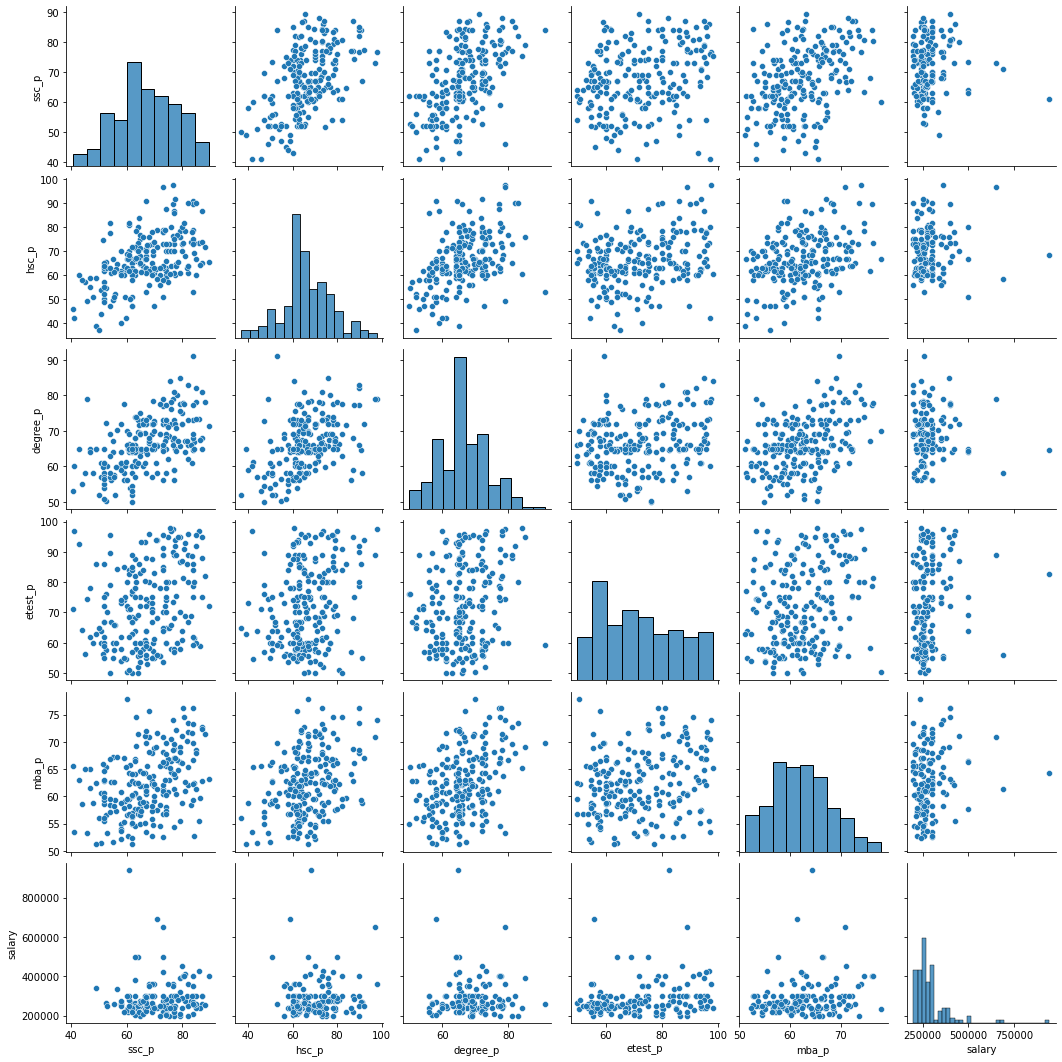

In [80]:
sns.pairplot(num_col)
plt.show()

In [81]:
cat_col.columns

Index(['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex',
       'specialisation', 'status'],
      dtype='object')

In [82]:
cat_col

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
sl_no,,,,,,,,
1,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
2,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
3,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
4,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
5,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...,...
211,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
212,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed
213,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed


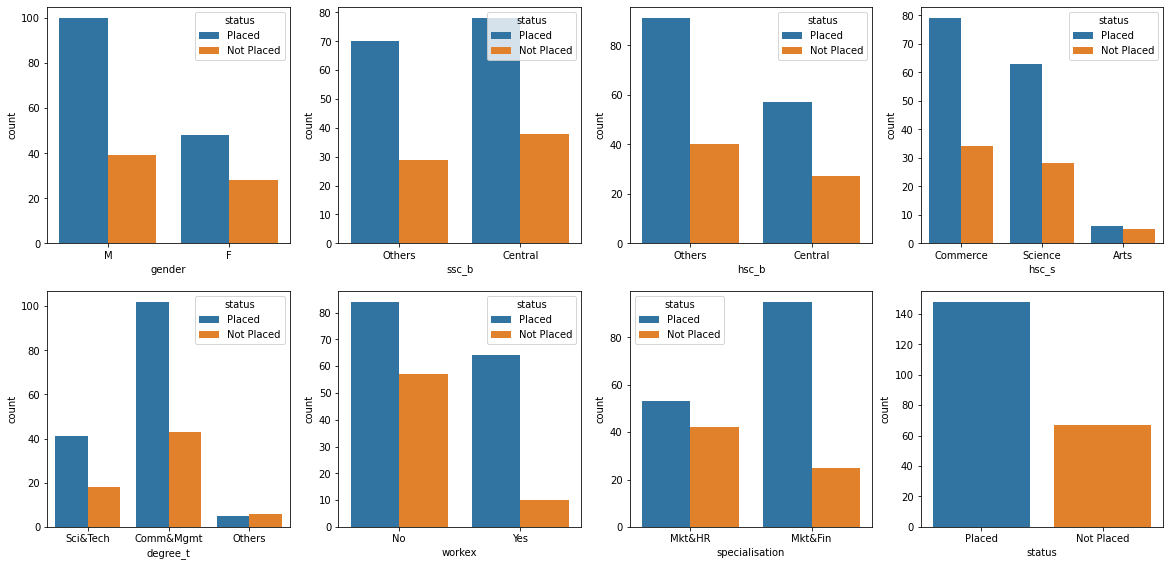

In [83]:
plt.figure(figsize = (20,20))
for i in range (len(cat_col.columns)):
    plt.subplot(4, 4, i+1)
    if (i<7):
        sns.countplot(df[cat_col.columns[i]], hue = cat_col.status)
    else:
        sns.countplot(df[cat_col.columns[i]])
    

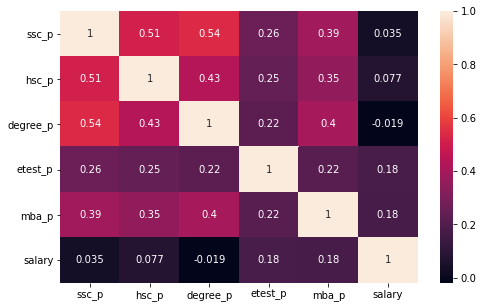

In [88]:
plt.figure(figsize = (8,5))
sns.heatmap(num_col.corr(), annot = True)
plt.show()

## dropping null values

In [91]:
df = df.dropna()
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.0,Mkt&Fin,62.14,Placed,252000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,62.00,Central,72.00,Central,Commerce,65.00,Comm&Mgmt,No,67.0,Mkt&Fin,56.49,Placed,216000.0
211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0


<AxesSubplot:xlabel='salary', ylabel='Density'>

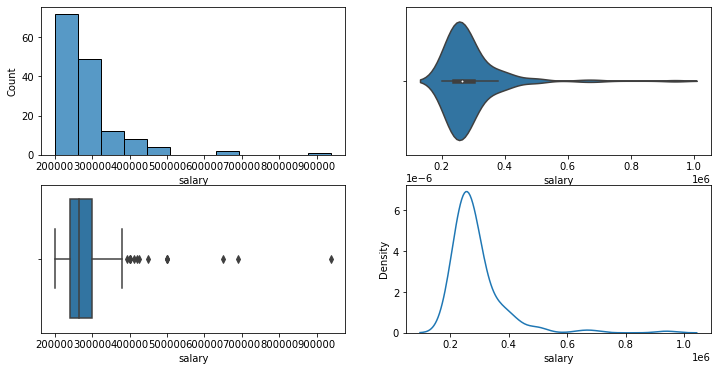

In [94]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.histplot(df.salary, bins = 12)
plt.subplot(2,2,2)
sns.violinplot(df.salary)
plt.subplot(2,2,3)
sns.boxplot(df.salary)
plt.subplot(2,2,4)
sns.kdeplot(df.salary)

###  Insight:
from the above graph data transformation is required to see if it can deal woth the outliers

## log transformation

In [112]:
df['salary'] = round(np.log(df.salary), 3)

In [113]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,12.503
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,12.207
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,12.429
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,12.962
8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.0,Mkt&Fin,62.14,Placed,12.441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,62.00,Central,72.00,Central,Commerce,65.00,Comm&Mgmt,No,67.0,Mkt&Fin,56.49,Placed,12.280
211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,12.897
212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,12.528


<AxesSubplot:xlabel='salary', ylabel='Density'>

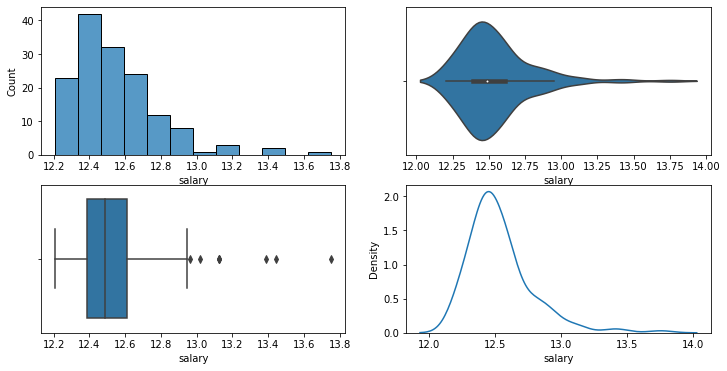

In [98]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.histplot(df.salary, bins = 12)
plt.subplot(2,2,2)
sns.violinplot(df.salary)
plt.subplot(2,2,3)
sns.boxplot(df.salary)
plt.subplot(2,2,4)
sns.kdeplot(df.salary)

### Insight
Log tranformation worked but there is still a lot of outliers, that need to be tackle

# Treating outliers

In [117]:
Q1 = df['salary'].quantile(0.25)
Q3 = df['salary'].quantile(0.75)
IQR = Q3-Q1
print(Q1, Q3, IQR)
UL = Q3+(1.5*IQR)
LL = Q1-(1.5*IQR)

12.391 12.616 0.22499999999999964


In [123]:
upper = np.where(df.salary > UL, df.index,-1)
upper = upper[upper >-1]
print(upper)

lower = np.where(df.salary < LL, df.index,-1)
lower = lower[lower >-1]
print(lower)

[  5  54  78 120 151 164 175 178]
[]


In [124]:
df = df.drop(index = upper, axis = 0)
df.shape

(140, 14)

In [125]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,12.503
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,12.207
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,12.429
8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed,12.441
9,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed,12.354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,62.00,Central,72.00,Central,Commerce,65.00,Comm&Mgmt,No,67.00,Mkt&Fin,56.49,Placed,12.280
211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.00,Mkt&Fin,74.49,Placed,12.897
212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.00,Mkt&Fin,53.62,Placed,12.528


In [129]:
cat_col 

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
sl_no,,,,,,,,
1,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
2,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
3,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
4,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
5,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...,...
211,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
212,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed
213,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed


In [130]:
cat_col = df.select_dtypes(include = ['object']).columns
cat_col

Index(['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex',
       'specialisation', 'status'],
      dtype='object')

In [132]:
num_col = df.select_dtypes(exclude = ['object']).columns
num_col

Index(['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary'], dtype='object')

In [135]:
df[cat_col]

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
sl_no,,,,,,,,
1,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
2,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
3,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
8,M,Central,Central,Science,Sci&Tech,Yes,Mkt&Fin,Placed
9,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...,...
210,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
211,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
212,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed


In [136]:
df[num_col]

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,,,,,,
1,67.00,91.00,58.00,55.00,58.80,12.503
2,79.33,78.33,77.48,86.50,66.28,12.207
3,65.00,68.00,64.00,75.00,57.80,12.429
8,82.00,64.00,66.00,67.00,62.14,12.441
9,73.00,79.00,72.00,91.34,61.29,12.354
...,...,...,...,...,...,...
210,62.00,72.00,65.00,67.00,56.49,12.280
211,80.60,82.00,77.60,91.00,74.49,12.897
212,58.00,60.00,72.00,74.00,53.62,12.528


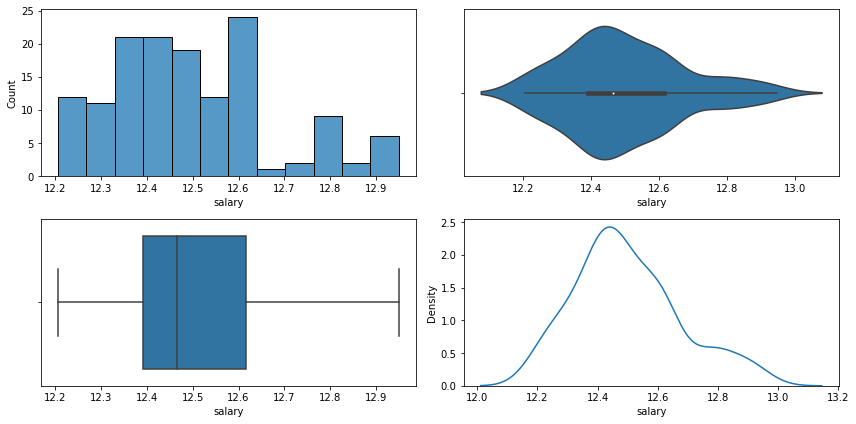

In [138]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.histplot(df.salary, bins = 12)
plt.subplot(2,2,2)
sns.violinplot(df.salary)
plt.subplot(2,2,3)
sns.boxplot(df.salary)
plt.subplot(2,2,4)
sns.kdeplot(df.salary)
plt.tight_layout()

# Label Encoding

In [143]:
labelencoder = pre.LabelEncoder()
for i in cat_col:
    df[i]= labelencoder.fit_transform(df[i])
df[cat_col].head(4)

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
sl_no,,,,,,,,
1,1,1,1,1,2,0,1,0
2,1,0,1,2,2,1,0,0
3,1,0,0,0,0,0,0,0
8,1,0,0,2,2,1,0,0


In [144]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,1,67.00,1,91.00,1,1,58.00,2,0,55.00,1,58.80,0,12.503
2,1,79.33,0,78.33,1,2,77.48,2,1,86.50,0,66.28,0,12.207
3,1,65.00,0,68.00,0,0,64.00,0,0,75.00,0,57.80,0,12.429
8,1,82.00,0,64.00,0,2,66.00,2,1,67.00,0,62.14,0,12.441
9,1,73.00,0,79.00,0,1,72.00,0,0,91.34,0,61.29,0,12.354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,62.00,0,72.00,0,1,65.00,0,0,67.00,0,56.49,0,12.280
211,1,80.60,1,82.00,1,1,77.60,0,0,91.00,0,74.49,0,12.897
212,1,58.00,1,60.00,1,2,72.00,2,0,74.00,0,53.62,0,12.528


<AxesSubplot:>

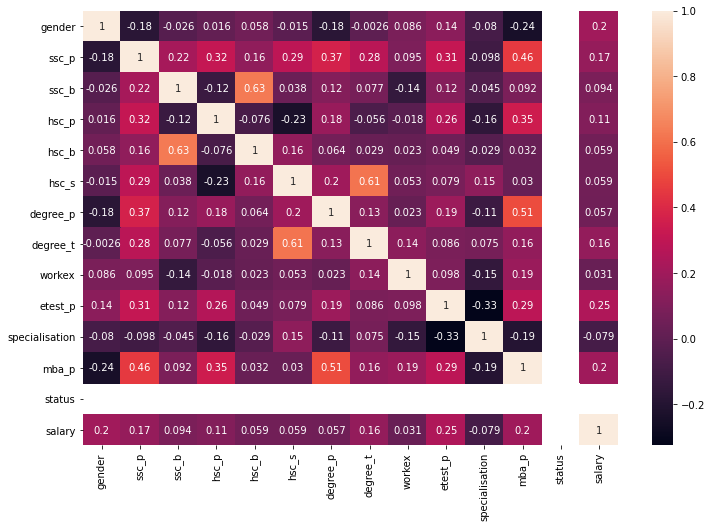

In [147]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(), annot = True)

In [148]:
df.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status',
       'salary'],
      dtype='object')

In [150]:
df = df.drop(['hsc_b', 'hsc_s', 'degree_p', 'specialisation', 'status'], axis = 1)

In [151]:
df

,gender,ssc_p,ssc_b,hsc_p,degree_t,workex,etest_p,mba_p,salary
sl_no,,,,,,,,,
1,1,67.00,1,91.00,2,0,55.00,58.80,12.503
2,1,79.33,0,78.33,2,1,86.50,66.28,12.207
3,1,65.00,0,68.00,0,0,75.00,57.80,12.429
8,1,82.00,0,64.00,2,1,67.00,62.14,12.441
9,1,73.00,0,79.00,0,0,91.34,61.29,12.354
...,...,...,...,...,...,...,...,...,...
210,1,62.00,0,72.00,0,0,67.00,56.49,12.280
211,1,80.60,1,82.00,0,0,91.00,74.49,12.897
212,1,58.00,1,60.00,2,0,74.00,53.62,12.528


<AxesSubplot:>

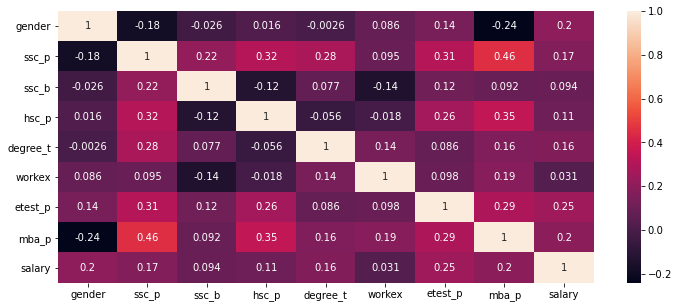

In [153]:
plt.figure(figsize = (12,5))
sns.heatmap(df.corr(), annot = True)

In [154]:
df.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'degree_t', 'workex', 'etest_p',
       'mba_p', 'salary'],
      dtype='object')

In [155]:
df = df.drop(['mba_p', 'workex', 'hsc_p'], axis = 1)

In [156]:
df

,gender,ssc_p,ssc_b,degree_t,etest_p,salary
sl_no,,,,,,
1,1,67.00,1,2,55.00,12.503
2,1,79.33,0,2,86.50,12.207
3,1,65.00,0,0,75.00,12.429
8,1,82.00,0,2,67.00,12.441
9,1,73.00,0,0,91.34,12.354
...,...,...,...,...,...,...
210,1,62.00,0,0,67.00,12.280
211,1,80.60,1,0,91.00,12.897
212,1,58.00,1,2,74.00,12.528


<AxesSubplot:>

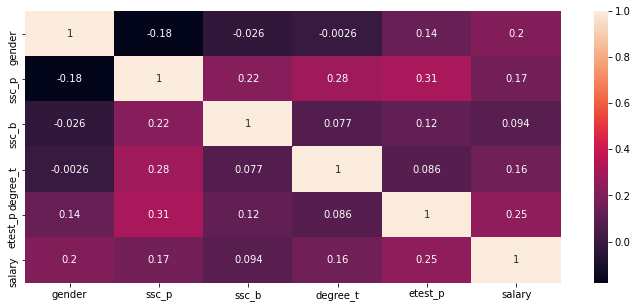

In [157]:
plt.figure(figsize = (12,5))
sns.heatmap(df.corr(), annot = True)

# Building the Model

In [197]:
X = df.drop('salary', axis = 1)
Y = df.salary


# splitting to train and test data
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y, test_size = 0.2, random_state = 1234)

In [198]:
X_train.shape, Y_train.shape, X_test.shape,Y_test.shape

((112, 5), (112,), (28, 5), (28,))

In [199]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

print(lr.intercept_, lr.coef_)


12.097200055432468 [ 0.07638493  0.00360849 -0.00134246  0.01682262  0.00117157]


In [200]:
Y_pred = lr.predict(X_test)
Y_test = np.exp(Y_test)
Y_pred = np.exp(Y_pred)
print('mean square error:', MSE(Y_test, Y_pred))
print('Root mean square error:', math.sqrt(MSE(Y_test, Y_pred)))
print('R squared:', Rsquared(Y_test, Y_pred))

mean square error: 1796993578.7131288
Root mean square error: 42390.961049652185
R squared: 0.15360964316152825


In [201]:
x = X_train
y = Y_train
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     2.507
Date:                Mon, 08 May 2023   Prob (F-statistic):             0.0346
Time:                        08:38:10   Log-Likelihood:                 41.364
No. Observations:                 112   AIC:                            -70.73
Df Residuals:                     106   BIC:                            -54.42
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.0972      0.150     80.576      0.0

# Stepwise Regression

In [203]:
def accuracy(col_list):
    X = df[col_list]
    Y = df.salary


    # splitting to train and test data
    X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y, test_size = 0.2, random_state = 1234)
    lr = LinearRegression()
    lr.fit(X_train, Y_train)

    print(lr.intercept_, lr.coef_)

    Y_pred = lr.predict(X_test)
    Y_test = np.exp(Y_test)
    Y_pred = np.exp(Y_pred)
    print('mean square error:', MSE(Y_test, Y_pred))
    print('Root mean square error:', math.sqrt(MSE(Y_test, Y_pred)))
    print('R squared:', Rsquared(Y_test, Y_pred))

In [215]:
df.columns

Index(['gender', 'ssc_p', 'ssc_b', 'degree_t', 'etest_p', 'salary'], dtype='object')

In [216]:
#testing all columns
independent = ['gender', 'ssc_p', 'ssc_b', 'degree_t', 'etest_p']
accuracy(independent)

12.097200055432468 [ 0.07638493  0.00360849 -0.00134246  0.01682262  0.00117157]
mean square error: 1796993578.7131288
Root mean square error: 42390.961049652185
R squared: 0.15360964316152825


In [217]:
#removing gender and keeping gender as Rsquared decreases
independent.pop(independent.index('gender'))
print('columns considered:', independent)
accuracy(independent)
independent.append('gender')

columns considered: ['ssc_p', 'ssc_b', 'degree_t', 'etest_p']
12.189858811049588 [ 0.00236913 -0.00056118  0.02067914  0.00173423]
mean square error: 1861925944.0222478
Root mean square error: 43150.03990753946
R squared: 0.12302626852103105


In [218]:
#removing 'ssc_p' as Rsquared increases
independent.pop(independent.index('ssc_p'))
print('columns considered:', independent)
accuracy(independent)
#col_list.append('gender')

columns considered: ['ssc_b', 'degree_t', 'etest_p', 'gender']
12.293134845781637 [0.00902313 0.02856844 0.00199706 0.06240409]
mean square error: 1624008110.6134918
Root mean square error: 40298.98398984138
R squared: 0.2350864129213689


In [219]:
#removing 'ssc_b' and keeping ssc_b as Rsquared decreases
independent.pop(independent.index('ssc_b'))
print('columns considered:', independent)
accuracy(independent)
independent.append('ssc_b')

columns considered: ['degree_t', 'etest_p', 'gender']
12.294200922914404 [0.02842994 0.00204563 0.06203871]
mean square error: 1646136422.1756153
Root mean square error: 40572.6067954182
R squared: 0.22466389959624566


In [220]:
#removing 'degree_t' as Rsquared increases
independent.pop(independent.index('degree_t'))
print('columns considered:', independent)
accuracy(independent)
independent.append('degree_t')

columns considered: ['etest_p', 'gender', 'ssc_b']
12.300296859087691 [0.00213138 0.06217349 0.00765582]
mean square error: 1688081505.8723142
Root mean square error: 41086.26906732119
R squared: 0.20490761622483133


In [221]:
#removing 'etest_p' and keeping 'etest_p' as Rsquared decreases
independent.pop(independent.index('etest_p'))
print('columns considered:', independent)
accuracy(independent)
independent.append('etest_p')

columns considered: ['gender', 'ssc_b', 'degree_t']
12.428428076953004 [0.0685218  0.01711999 0.03083637]
mean square error: 1858162605.8618145
Root mean square error: 43106.41026415693
R squared: 0.12479881415850302
